### TensorFlow 2.0
This is the TensorFlow 2.0 implementation of MNIST classification. The implementation in 2.0 is far different to the steps required with tensorflow v1 and I just wanted to see what the new process is like.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set()

The location of the MNIST dataset has changed. Before it used to be at tensorflow.examples.tutorials.mnist but this module got depreciated in TF 2.0. The MNIST dataset can now be found at tf.keras.datasets.mnist

In [36]:
mnist = tf.keras.datasets.mnist

In [9]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
## train_x has training samples and train_y has the classification or labels
## test_x has samples we will test on and test_y has those classifications or labels

print("Train x size: {} and Train y size: {}".format(len(train_x), len(train_y)))
print("Test x size: {} and Test y size: {}".format(len(test_x), len(test_y)))

Train x size: 60000 and Train y size: 60000
Test x size: 10000 and Test y size: 10000


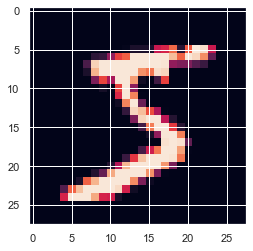

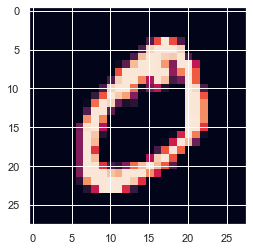

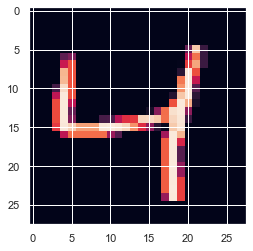

In [10]:
## Quickly going to visualize what the inputs are going to look like
for i in range(3):
    plt.imshow(train_x[i])
    plt.show()

Normalizing using the tf.keras.utils.normalize method, without normalization the model has a hard time learning and the accuracy is laughable

In [16]:
## Going to normalize the inputs for better performance of network
## Tested without and the accuracy is 9 fold worse
train_x = tf.keras.utils.normalize(train_x, axis=1)
test_x = tf.keras.utils.normalize(test_x, axis=1)
#train_x

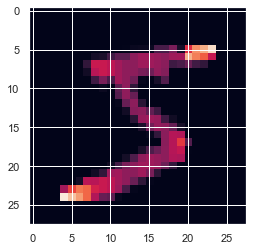

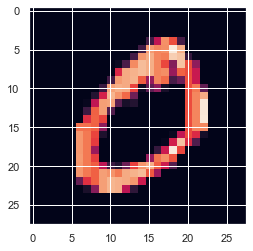

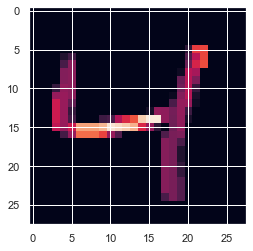

In [17]:
## Quickly going to visualize what the inputs are going to look like
for i in range(3):
    plt.imshow(train_x[i])
    plt.show()

Building the model with 2 hidden layers each with size 128 using the relu activation, and the final output layer is of size 10 using the softmax activation. The model will automatically stop after loss dips 2 times (patience 2)

In [21]:
## Creating the architecture of the model which will have 2 hiddel layers and use softmax activation for classification
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

##Implementing Early Stopping and will monitor for 2 loss dips
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In [22]:
## Whill be using categorical_crossenthropy over binary_crossenthropy due to the number of classes is 10
## Whill be using categorical_crossenthropy over binary_crossenthropy due to the number of classes is 10
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_x, train_y, epochs=50, callbacks= [callback])#

Epoch 1/50
1875/1875 [==============================] - 2s 937us/step - loss: 1.5723 - accuracy: 0.9019
Epoch 2/50
1875/1875 [==============================] - 2s 894us/step - loss: 1.5134 - accuracy: 0.9501
Epoch 3/50
1875/1875 [==============================] - 2s 920us/step - loss: 1.5009 - accuracy: 0.9620
Epoch 4/50
1875/1875 [==============================] - 2s 954us/step - loss: 1.4949 - accuracy: 0.9675
Epoch 5/50
1875/1875 [==============================] - 2s 900us/step - loss: 1.4901 - accuracy: 0.9722
Epoch 6/50
1875/1875 [==============================] - 2s 915us/step - loss: 1.4862 - accuracy: 0.9758
Epoch 7/50
1875/1875 [==============================] - 2s 906us/step - loss: 1.4835 - accuracy: 0.9785
Epoch 8/50
1875/1875 [==============================] - 2s 901us/step - loss: 1.4821 - accuracy: 0.9795
Epoch 9/50
1875/1875 [==============================] - 2s 900us/step - loss: 1.4810 - accuracy: 0.9805
Epoch 10/50
1875/1875 [==============================] - 2s 903u

Evaluating the model loss and accuracy on the test dataset

In [27]:
## Validation loss is forward feeding and does not use backprop
val_loss, val_acc = model.evaluate(test_x, test_y)
print("Validation Loss: {} and Validation Accuracy: {}".format(val_loss, val_acc))

313/313 [==============================] - 0s 558us/step - loss: 1.4896 - accuracy: 0.9713
Validation Loss: 1.4895578622817993 and Validation Accuracy: 0.9713000059127808


Saving the model, not necessary since training time is quick, why not.

In [34]:
model.save('MNIST_classification.model')

INFO:tensorflow:Assets written to: MNIST_classification.model/assets


Visualizing predictions

1


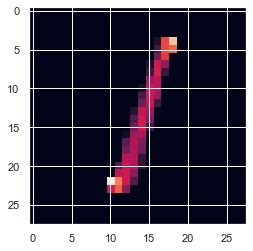

In [33]:
## Generating predictions
predict = model.predict(test_x)

## index looking to visualize
i = 2
print(np.argmax(predict[i]))
plt.imshow(test_x[i])